In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from learning_analysis import learning_analysis
from bias_variance_analysis import bias_variance_analysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


In [3]:
# Read the preprocessed data
df = pd.read_csv('../dataset/body_level_classification_train_preprocessed.csv')

X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

In [4]:
# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

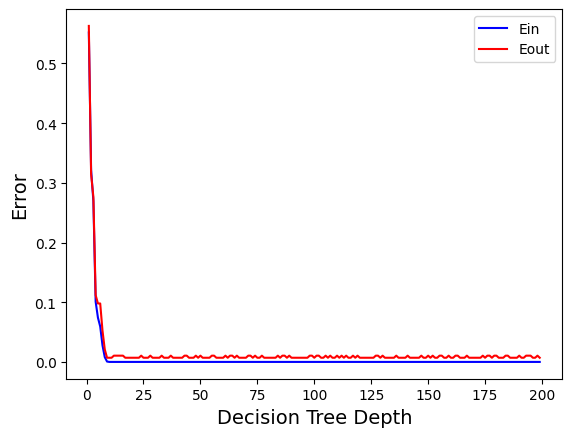

In [5]:
values = [i for i in range(1, 200)]
train_scores = []
val_scores = []
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the validation dataset
    val_yhat = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_yhat)
    val_scores.append(val_acc)
    
train_loss = [1 - i for i in train_scores]
val_loss = [1 - i for i in val_scores]

# plot of train and validation scores vs tree depth
plt.style.use('default')
plt.plot(values, train_loss, color='b', label='Ein')
plt.plot(values, val_loss, color='r', label='Eout')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Decision Tree Depth', fontsize = 14)
plt.legend()
plt.show()

In [13]:
# lets test other parameters using GridSearchCV and RandomizedSearchCV

param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [14]:
# Fit the random forest model
model_architecture = DecisionTreeClassifier(max_depth=25)

In [16]:
# Grid search


grid_search = GridSearchCV(model_architecture, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Random search
random_search = RandomizedSearchCV(model_architecture, param_distributions=param_grid, cv=5, n_jobs=-1, n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator from the grid search or random search
best_model = grid_search.best_estimator_

print("Best hyperparameters found by grid search:", grid_search.best_params_)
print("Best hyperparameters found by random search:", random_search.best_params_)

# same as model default parameters

Best hyperparameters found by grid search: {'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best hyperparameters found by random search: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}


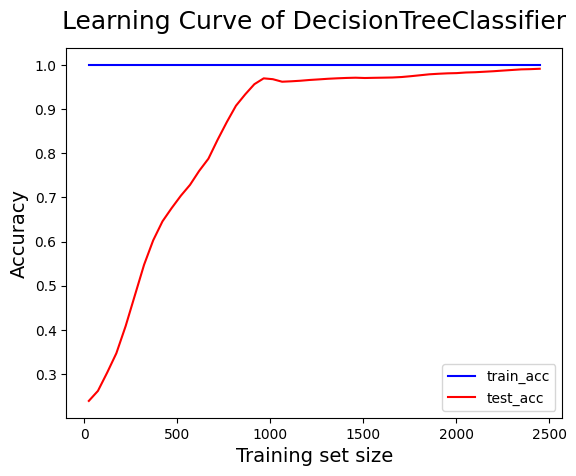

In [7]:
learning_analysis(model_architecture, X, y)

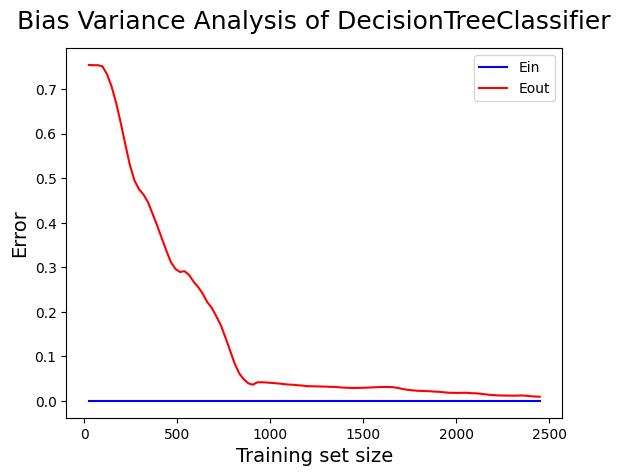

In [8]:
bias_variance_analysis(model_architecture, X, y)

In [9]:
# Fit the model
model = model_architecture.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='weighted', multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Accuracy: 0.9791666666666666
Precision: 0.9790962429041814
Recall: 0.9791666666666666
F1-score: 0.9791051698431802
AUC-ROC: 0.9861169271922572


In [10]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       204
           2       0.97      0.97      0.97       197
           3       0.97      0.96      0.96       205
           4       0.98      0.99      0.99       210

    accuracy                           0.98       816
   macro avg       0.98      0.98      0.98       816
weighted avg       0.98      0.98      0.98       816

